#  Graph Centrality Homework
**University of Illinois**
<br>CSC 570 - Data Science Essentials
<br>Author: Arthur Putnam

## Lab Directions
1.  Download the ipython notebook titled 'network analysis.ipynb' from the class github.

2.  Answer the questions contained within the notebook

3.  Submit a link to your completed notebook.


In [6]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
M=nx.read_gml("polblogs.gml")

In [4]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



### 1.  Create a nice looking graph of the political blog network

C:\Users\Aj-Pu\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


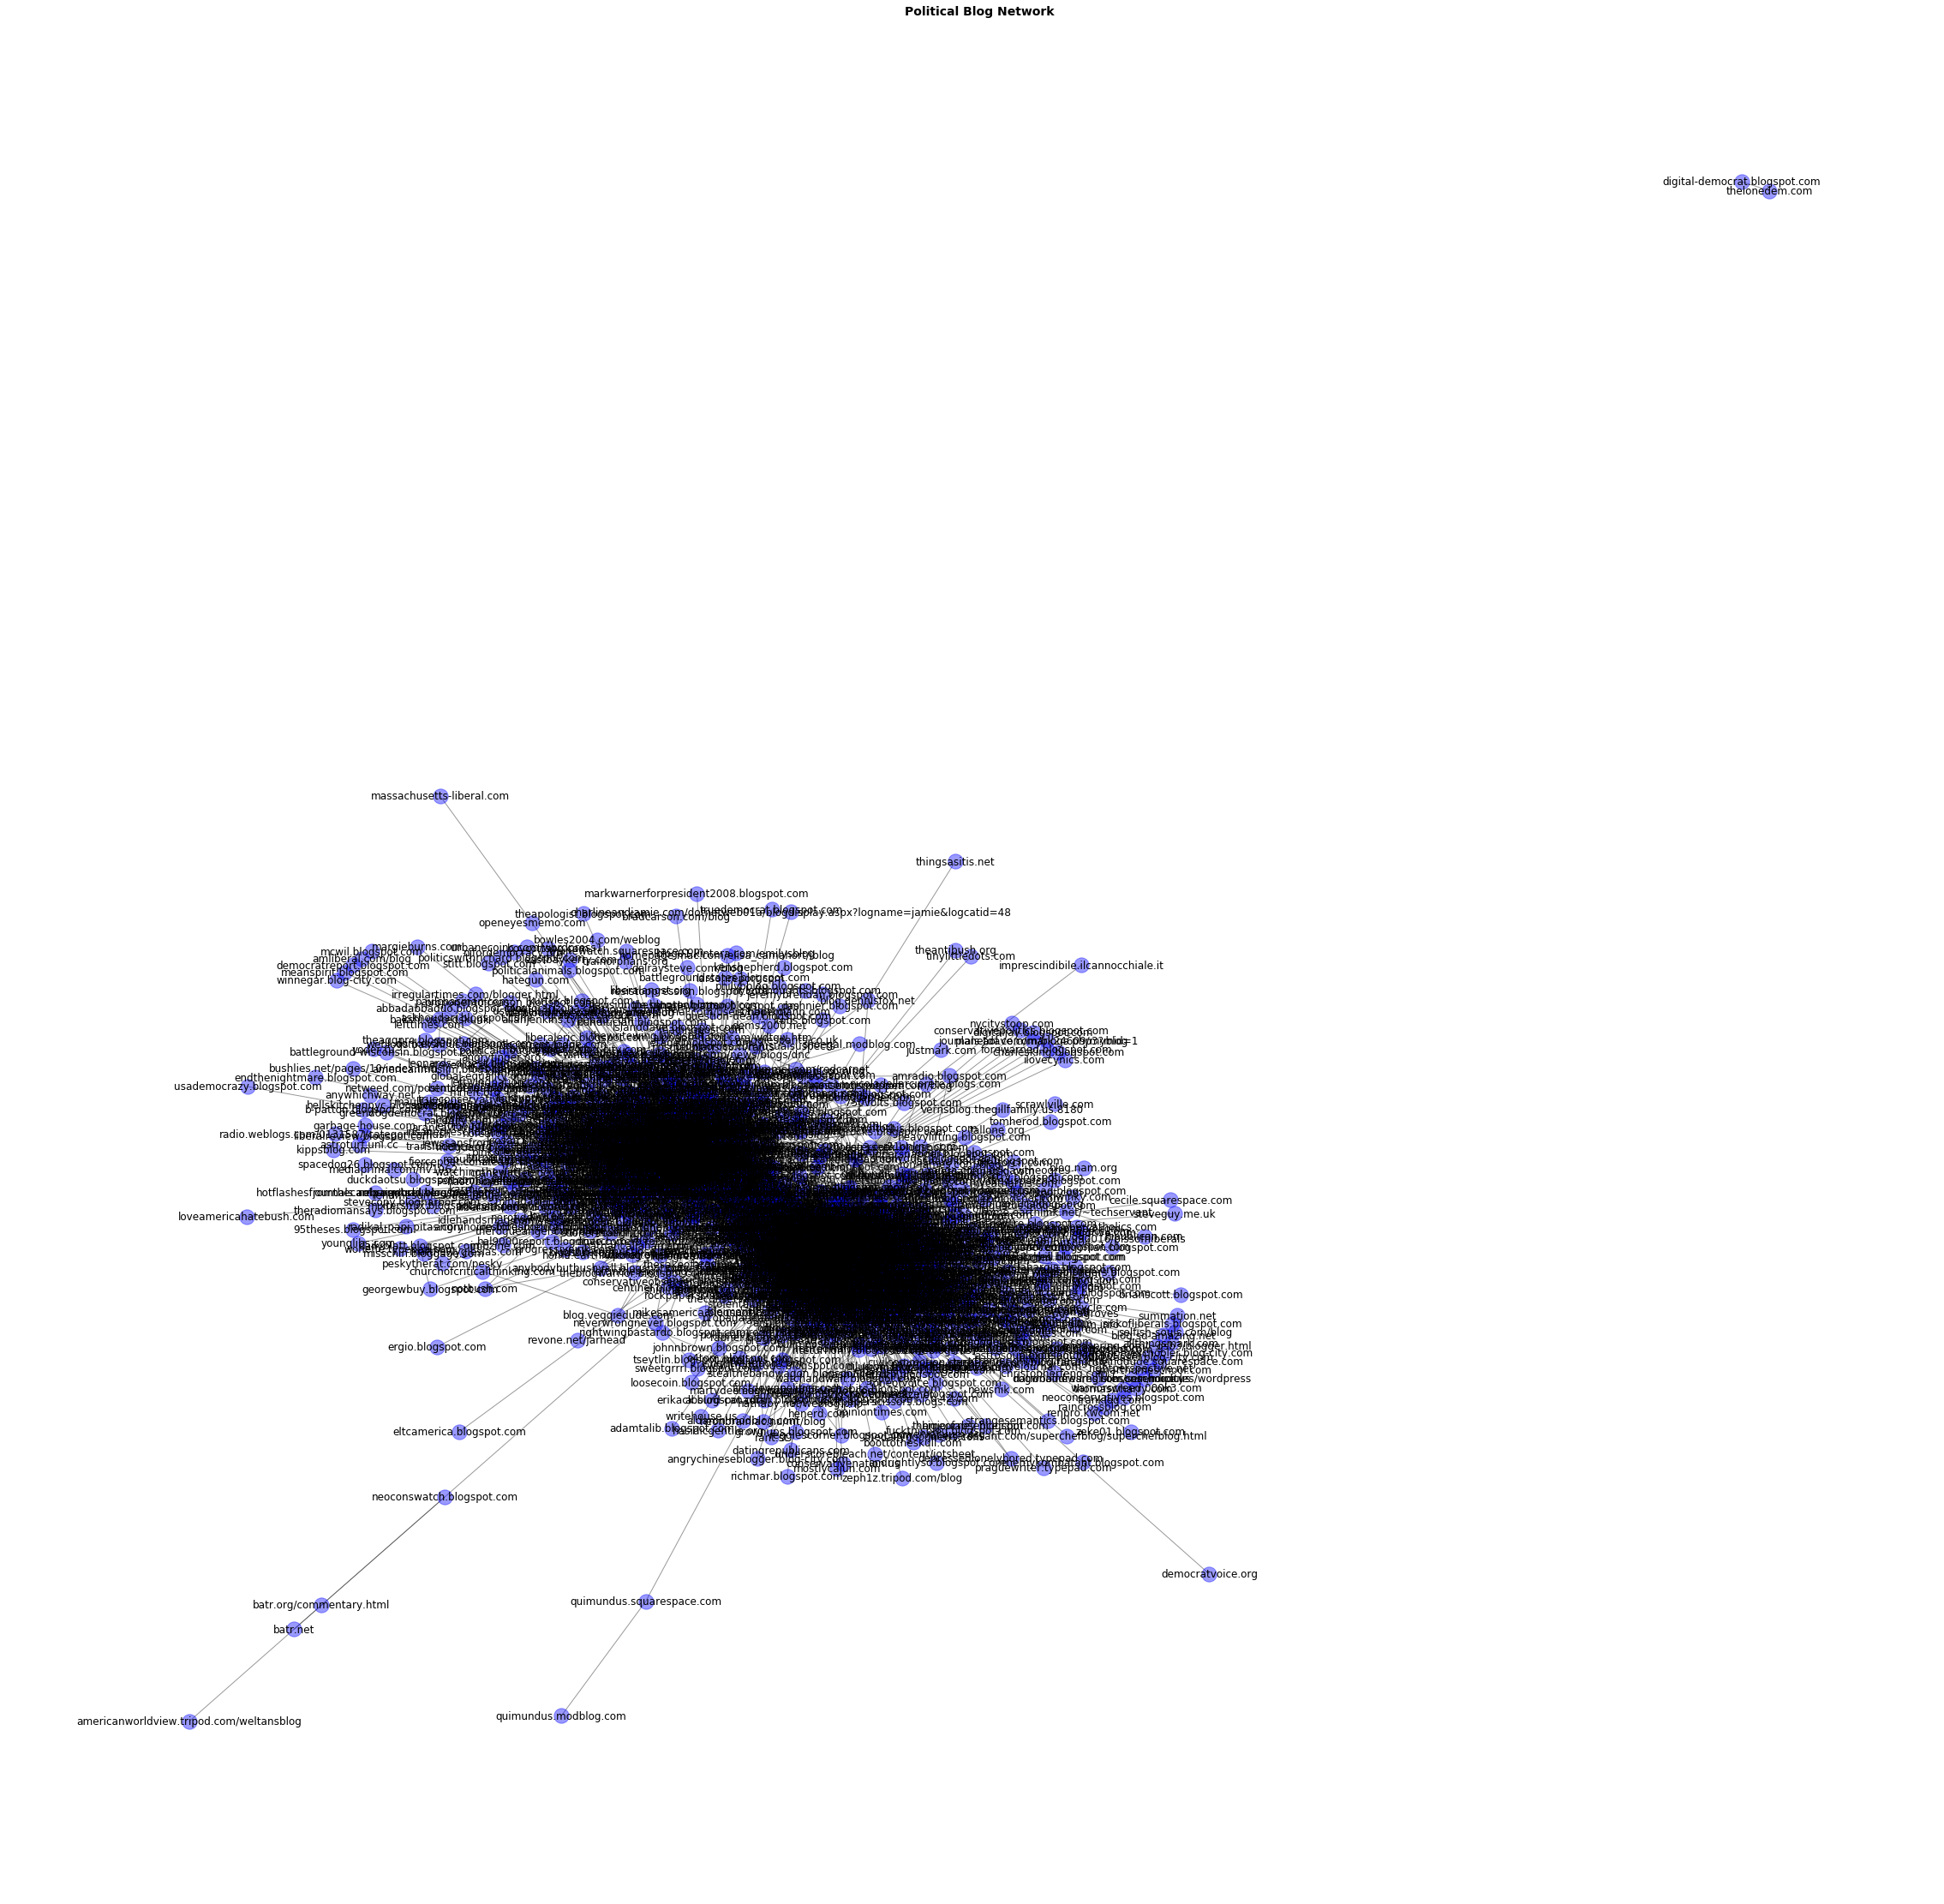

In [8]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=10, k=.4)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica', 
        'color'      : 'k',
        'fontweight' : 'bold',
        'fontsize'   : 14}
plt.title("Political Blog Network", font)
nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [13]:
# dict of centrality
centrality=nx.eigenvector_centrality(G) 

# convert to list of tuples to sort.
blogs = [(node,centrality[node]) for node in centrality]  

sorted_blogs = blogs.sort(key=lambda x: x[1])
sorted(blogs, key=lambda x: x[1], reverse=True)[:10]

[('atrios.blogspot.com', 0.19480797936637684),
 ('dailykos.com', 0.1608974020523482),
 ('washingtonmonthly.com', 0.14653924259836862),
 ('digbysblog.blogspot.com', 0.1426436922171831),
 ('bodyandsoul.typepad.com', 0.14113489174330351),
 ('liberaloasis.com', 0.1395237157110786),
 ('tbogg.blogspot.com', 0.1370364169982425),
 ('corrente.blogspot.com', 0.1294175927409614),
 ('talkingpointsmemo.com', 0.12700519780790948),
 ('dneiwert.blogspot.com', 0.12237564692546019)]

### 3.  What are the 10 least influential blogs?



In [14]:
sorted(blogs, key=lambda x: x[1], reverse=True)[-10:]

[('thingsasitis.net', 1.1736249650658601e-05),
 ('massachusetts-liberal.com', 9.4833652357345e-06),
 ('quimundus.squarespace.com', 6.061741218869528e-06),
 ('democratvoice.org', 1.0233388204113296e-06),
 ('batr.net', 6.796325594929456e-07),
 ('batr.org/commentary.html', 6.795517611554003e-07),
 ('quimundus.modblog.com', 6.682929975006485e-08),
 ('americanworldview.tripod.com/weltansblog', 7.491540638916238e-09),
 ('digital-democrat.blogspot.com', 1.7763251097559653e-72),
 ('thelonedem.com', 1.7763251097559653e-72)]